# A look at World Hapiness from 2015 to 2019

![](image1.png)

## Introduction
For my personal project as part of the Data Science Bootcamp (The Bridge), I have chosen to dive deepe in a subject of great importance (especially during the current situation worlwide): Happiness. I have decided to futher investigate which countries in the world are most happy, and more importantly: which factors are actually an influence in this. 

I have chosen to use data of the World Happiness Report from Kaggle. The World Happiness Report is a landmark survey of the state of global happiness that ranks (around) 156 countries by how happy their citizens perceive themselves to be. 

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. The Happiness Score is the sum of the index of several different factors taken into account in the happiness report. For this analysis we will be focusing on the following factors that influence the happiness score:

- GDP per capita:
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption

In order for myself to practise more with obtaining data, data wrangling and mining I have decided to no just use the dataframes found at kaggle, but search for additional data to add from different sources. This will be information on:

- The Global Peace Index(GPI)
- Unemployment Rate

Sources: https://www.kaggle.com/mathurinache/world-happiness-report, http://visionofhumanity.org/indexes/global-peace-index/ https://worldhappiness.report/ 


Defenition of the factors used in the analysis:

- GDP per capita: GDP per capita is a measure of a country's economic output that accounts for its number of people.

- Social support: Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.

- Healthy life expectancy: Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.

- Freedom to make life choices:Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

- Generosity:the quality of being kind and generous.

- Perceptions of corruption:The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

- The Global Peace Index(GPI): The GPI ranks 172 independent states and territories (99.7 per cent of the world's population) according to their levels of peacefulness. The lower the score, the more peacefull the country is. 

- Unemployment Rate: The unemployment rate is calculated by expressing the number of unemployed persons as a
  percentage of the total number of persons in the labour force (all people between the age of 15 and 64).

Sources: https://www.kaggle.com/mathurinache/world-happiness-report, http://visionofhumanity.org/indexes/global-peace-index/ https://worldhappiness.report/, https://www.ilo.org/ilostat-files/Documents/description_UR_EN.pdf, https://en.wikipedia.org/wiki/Global_Peace_Index.

## Hypothesis

During the analysis of the data regarding World Happiness, I would like to find out if the following statements are correct:
- The happiest country in the world does not change over the years / The happiest country(rank 1) is the same each year. 
- The most important factor to influence world happiness is GDP / The famous quote: "Money makes happiness" is    true.
- (Europe is the happiest continent on the planet)

## Method of working

1. Collecting the necessary data
2. Cleaning and filtering datasets
3. Studying and visualizing the data.
4. Drawing conclusions on hypothesis


Importing the necessary libraries:

In [1]:
os.path.abspath('')
root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(root_path)

import pandas as pd
import numpy as np
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import missingno
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import *
import xlrd
from utils.mining_data_tb import *
from IPython.display import Image
from utils.visualization_tb import *
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot
from bubbly.bubbly import bubbleplot


In [2]:
test()

I'm working


### 1. Collecting Data

In [3]:
#Importing datasets of yearly world hapiness report from Kaggle: https://www.kaggle.com/mathurinache/world-happiness-report.
data_2015 = pd.read_csv("datasets_2015.csv")
data_2016 = pd.read_csv("datasets_2016.csv")
data_2017 = pd.read_csv("datasets_2017.csv")
data_2018 = pd.read_csv("datasets_2018.csv")
data_2019 = pd.read_csv("datasets_2019.csv")
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
#importing content table from Wikipedia with Gloval Peace Index per country from 2008 to 2019
url = "https://en.wikipedia.org/wiki/Global_Peace_Index"
df_world_peace = pd.read_html(url)[2]
df_world_peace.head()

,Country,2019 rank,2019 score[12],2018 rank,2018 score[13],2017 rank,2017 score[2],2016 rank,2016 score[14],2015 rank,...,2012 rank,"2012 score[18],[19]",2011 rank,2011 score[20],2010 rank,2010 score[21],2009 rank,2009 score,2008 rank,2008 score
0,Iceland,1,1.072,1,1.096,1,1.084,1,1.138,1,...,1,1.159,1,1.099,1,1.143,1,1.160,1,1.111
1,New Zealand,2,1.221,2,1.188,2,1.216,3,1.238,3,...,3,1.276,2,1.255,2,1.251,2,1.260,2,1.261
2,Portugal,3,1.274,5,1.315,3,1.273,5,1.324,12,...,16,1.520,16,1.485,14,1.472,13,1.437,10,1.387
3,Austria,4,1.291,3,1.273,4,1.292,4,1.249,4,...,7,1.407,9,1.416,5,1.383,5,1.369,5,1.337
4,Denmark,5,1.316,4,1.313,5,1.299,2,1.201,2,...,2,1.235,3,1.290,4,1.334,3,1.269,3,1.272


In [5]:
#Importing content from Json file of unemployment rate per country from 2015 to 2019.Source:https://www.ilo.org/shinyapps/bulkexplorer15/?lang=en&segment=indicator&id=SDG_0852_SEX_AGE_RT_A 
df_unemployment = pd.read_json("percentage_unemployment.json")
df_unemployment.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Albania,SDG indicator 8.5.2 - Unemployment rate (%),ALB - LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2015,17.5806,None,None,None,Repository: ILO-STATISTICS - Micro data proces...
1,Albania,SDG indicator 8.5.2 - Unemployment rate (%),ALB - LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2016,15.8059,None,None,None,Repository: ILO-STATISTICS - Micro data proces...
2,Albania,SDG indicator 8.5.2 - Unemployment rate (%),ALB - LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2017,13.9826,None,None,None,Repository: ILO-STATISTICS - Micro data proces...
3,Albania,SDG indicator 8.5.2 - Unemployment rate (%),ALB - LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2018,12.7767,None,None,None,Repository: ILO-STATISTICS - Micro data proces...
4,Albania,SDG indicator 8.5.2 - Unemployment rate (%),ALB - LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2019,11.9473,None,None,None,Repository: ILO-STATISTICS - Micro data proces...


### 2. Cleaning Dataframes

Cleaning and manipulating the datasets will be a crucial step for this analysis. As I am working with dataframes from 3 different sources: World happiness reports from Kaggle, Global peace index table from Wikipedia and the unemployment rates from the International Labour Organization, I will first clean each dataset for the necessary columns and merge the dataframes from the 3 different sources in one dataframe per year. 

Below I will describe the cleaning process per dataset. The functions used in the cleaning process will be importen from the utils folder (Mining_data file).

1) Datasets from the world happiness reports.

As all the dataframes of the different years have slightly different columns names and in general different amount of columns, I will first clean the dataframe by applying the following steps:
- change the column names so they are all the same.
- filtering the dataframe with only the columns that are useful for the analysis and that are available in all      the dataframes.
- setting the country column as Index
- adding a column with the year for reference. This will come in handy when adding all the dataframes from the      different years together. 


In [6]:
Change_columns(df=data_2015)
data_2015 = Filter_dataframe(df=data_2015)
Add_year(df=data_2015, year="2015")

done


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
Rwanda,2015,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
Benin,2015,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
Syria,2015,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906


In [7]:
Change_columns(df=data_2016)
data_2016 = Filter_dataframe(df=data_2016)
Add_year(df=data_2016, year="2016")

done


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Denmark,2016,1,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
Switzerland,2016,2,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
Iceland,2016,3,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
Norway,2016,4,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
Finland,2016,5,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
...,...,...,...,...,...,...,...,...,...
Benin,2016,153,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681
Afghanistan,2016,154,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112
Togo,2016,155,3.303,0.28123,0.00000,0.24811,0.34678,0.17517,0.11587


In [8]:
Change_columns(df=data_2017)
data_2017 = Filter_dataframe(df=data_2017)
Add_year(df=data_2017, year="2017")

done


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Norway,2017,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
Denmark,2017,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
Iceland,2017,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
Switzerland,2017,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
Finland,2017,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...
Rwanda,2017,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
Syria,2017,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
Tanzania,2017,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035


In [9]:
Change_columns(df=data_2018)
data_2018 = Filter_dataframe(df=data_2018)
Add_year(df=data_2018, year="2018")

done


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Finland,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
Norway,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
Denmark,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
Iceland,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
Switzerland,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
Yemen,2018,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064
Tanzania,2018,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
South Sudan,2018,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106


In [10]:
Change_columns(df=data_2019)
data_2019 = Filter_dataframe(df=data_2019)
Add_year(df=data_2019, year="2019")

done


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,,
Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
Rwanda,2019,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,2019,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,2019,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


2) Dataset for World Peace Index.

As the dataset has columns of years that are not necessary and some column names that have extra characters and letters in it, I will be applying the following steps:
- filter the dataframe for the correct years
- clean the names of the columns
- setting country as index.  

In [11]:
df_world_peace = Clean_data_peace_index(df=df_world_peace)
df_world_peace

done


,2019 rank,2019 score,2018 rank,2018 score,2017 rank,2017 score,2016 rank,2016 score,2015 rank,2015 score
Country,,,,,,,,,,
Iceland,1,1.072,1,1.096,1,1.084,1,1.138,1,1.142
New Zealand,2,1.221,2,1.188,2,1.216,3,1.238,3,1.263
Portugal,3,1.274,5,1.315,3,1.273,5,1.324,12,1.418
Austria,4,1.291,3,1.273,4,1.292,4,1.249,4,1.264
Denmark,5,1.316,4,1.313,5,1.299,2,1.201,2,1.179
...,...,...,...,...,...,...,...,...,...,...
Yemen,159,3.369,160,3.436,161,3.516,162,3.530,160,3.481
Syria,160,3.412,158,3.308,157,3.316,157,3.287,148,2.840
South Sudan,161,3.526,161,3.525,160,3.462,161,3.524,161,3.491


3) Dataset for unemployment rate.

As the dataframe contains many unuseful columns, unclear column names and structure, I will pass the dataframe through a cleaning functions that will do the following:
- filter only the necessary columns
- change the columns names
- set Country and Year as indices

In [12]:
df_unemployment = clean_data_unemployment_rate(x=df_unemployment)
df_unemployment

Year,2015,2016,2017,2018,2019
Country,,,,,
Albania,17.5806,15.8059,13.9826,12.7767,11.9473
Argentina,NaN,NaN,8.5335,9.3666,10.0923
Armenia,18.8186,18.1652,18.2708,19.3374,NaN
Australia,6.2178,5.8676,5.7566,5.4573,5.3115
Austria,5.8226,6.1113,5.5785,4.9212,4.5524
...,...,...,...,...,...
United Kingdom,5.4372,4.9368,4.4372,4.0994,3.8272
United States,5.3661,4.9337,4.4040,3.9376,3.7180
Uruguay,7.7062,8.0649,8.1399,8.5756,9.5715


#### Merging dataframes

For further usage in this project, I will join the columns of the seperate years of the World Peace Index dataframe and the Unemployment Rate dataframe to the main dataframe of each corresponding year. 

In [13]:
#First we will filter the the dataframes that will be joined (world peace and unemployment) for the corresponding column of the correct year. Then all the dataframes will be run through a function that will join them based on the index of the main dataframe.
world_peace_2015 = df_world_peace.loc[:,"2015 score":"2015 score"]
unemployment_2015 = df_unemployment.loc[:, 2015:2015]
complete_data_2015 = join_df(df=data_2015, df1=world_peace_2015, df2=unemployment_2015)

Dataframes are joined


In [14]:
complete_data_2015

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.443,4.9200
Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.142,4.1591
Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.179,6.4513
Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1.483,4.4206
Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.337,6.9993
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,2015,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2.228,NaN
Benin,2015,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.975,NaN
Syria,2015,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2.840,NaN


In [15]:
world_peace_2016 = df_world_peace.loc[:,"2016 score":"2016 score"]
unemployment_2016 = df_unemployment.loc[:, 2016:2016]
complete_data_2016 = join_df(df=data_2016, df1=world_peace_2016, df2=unemployment_2016)

Dataframes are joined


In [16]:
world_peace_2017 = df_world_peace.loc[:,"2017 score":"2017 score"]
unemployment_2017 = df_unemployment.loc[:, 2017:2017]
complete_data_2017 = join_df(df=data_2017, df1=world_peace_2017, df2=unemployment_2017)

Dataframes are joined


In [17]:
world_peace_2018 = df_world_peace.loc[:,"2018 score":"2018 score"]
unemployment_2018 = df_unemployment.loc[:, 2018:2018]
complete_data_2018 = join_df(df=data_2018, df1=world_peace_2018, df2=unemployment_2018)

Dataframes are joined


In [18]:
world_peace_2019 = df_world_peace.loc[:,"2019 score":"2019 score"]
unemployment_2019 = df_unemployment.loc[:, 2019:2019]
complete_data_2019 = join_df(df=data_2019, df1=world_peace_2019, df2=unemployment_2019)

Dataframes are joined


In [19]:
complete_data_2019

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1.488,6.8335
Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1.316,5.1341
Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1.536,3.7848
Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1.072,3.6336
Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1.530,3.3744
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,2019,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2.014,NaN
Tanzania,2019,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1.860,NaN
Afghanistan,2019,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3.300,NaN


Now that we have the complete dataframes that we will work with in order to answer the hypothesis, we will conintue with having a thorough look at the data and clean it further if necessary by looking at the following steps:

- Check the types of the columns and changing the date column to a datetime64 type and setting it as our index.

- Checking the data for any Nan values.

- Checking for duplicates in the data.

In [20]:
#checking column types. The types seems to be correct in correspondance to the value they provide. Only the Year column seems to have an incorrect type which will be changed below. 
complete_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          158 non-null    object 
 1   Overall rank                  158 non-null    int64  
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
 9   Peace index                   143 non-null    float64
 10  Unemployment rate             82 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 13.6+ KB


In [21]:
#changing object for the column "Year" to datetime. As I have chosen to only display the Year from the datetime object the type will be int64. As the column Year is only added for reference it is not necessary to add the entire datetime.
to_datetime(complete_data_2015)
to_datetime(complete_data_2016)
to_datetime(complete_data_2017)
to_datetime(complete_data_2018)
to_datetime(complete_data_2019)

Done
Done
Done
Done
Done


In [22]:
complete_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          158 non-null    int64  
 1   Overall rank                  158 non-null    int64  
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
 9   Peace index                   143 non-null    float64
 10  Unemployment rate             82 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 14.2+ KB



Preview of data with null values:


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Luxembourg,2015,17,6.946,1.56391,1.21963,0.91894,0.61583,0.28034,0.37798,NaN,6.7057
United Arab Emirates,2015,20,6.901,1.42727,1.12575,0.80925,0.64157,0.26428,0.38583,1.767,NaN
Oman,2015,22,6.853,1.36011,1.08182,0.76276,0.63274,0.21542,0.32524,2.038,NaN


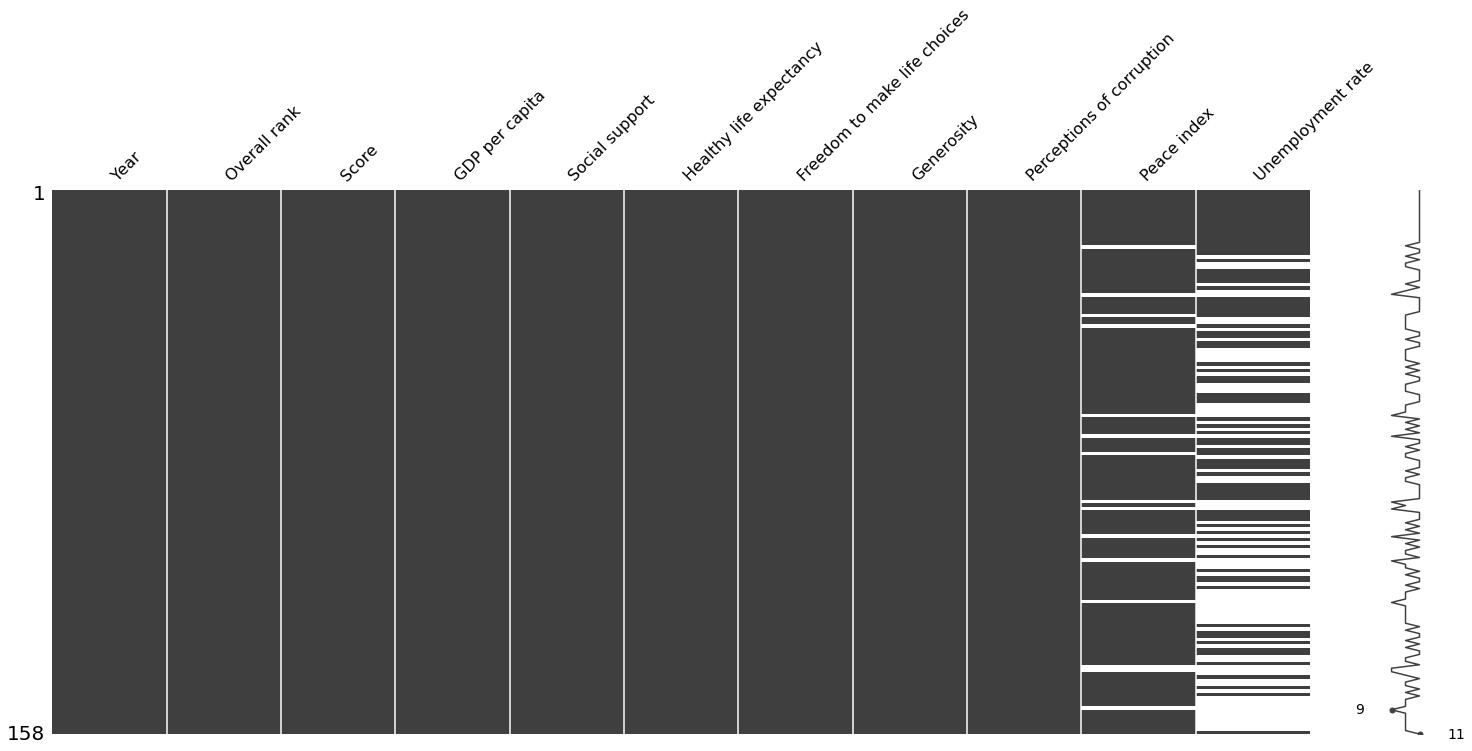

In [23]:
# Having a look at the NaN values of each dataset.
none_values(df=complete_data_2015)


Preview of data with null values:


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Puerto Rico,2016,15,7.039,1.35943,1.08113,0.77758,0.46823,0.22202,0.12275,NaN,NaN
Luxembourg,2016,20,6.871,1.69752,1.03999,0.84542,0.54870,0.27571,0.35329,NaN,6.3068
Argentina,2016,26,6.650,1.15137,1.06612,0.69711,0.42284,0.10989,0.07296,2.096,NaN


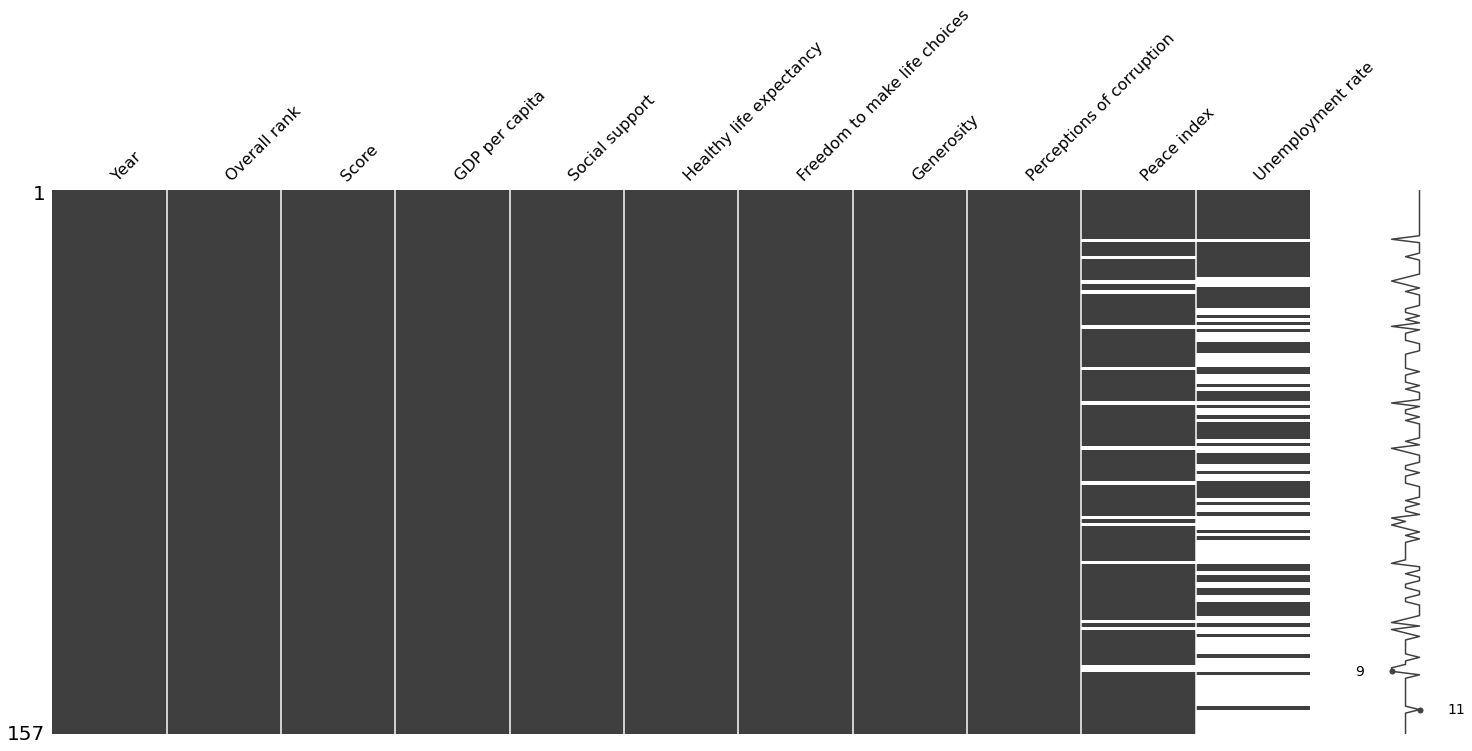

In [24]:
none_values(df=complete_data_2016)


Preview of data with null values:


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Luxembourg,2017,18,6.863,1.741944,1.457584,0.845089,0.596628,0.283181,0.318834,NaN,5.5186
Czech Republic,2017,23,6.609,1.352682,1.433885,0.754444,0.490946,0.088107,0.036873,NaN,NaN
Singapore,2017,26,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.4,NaN


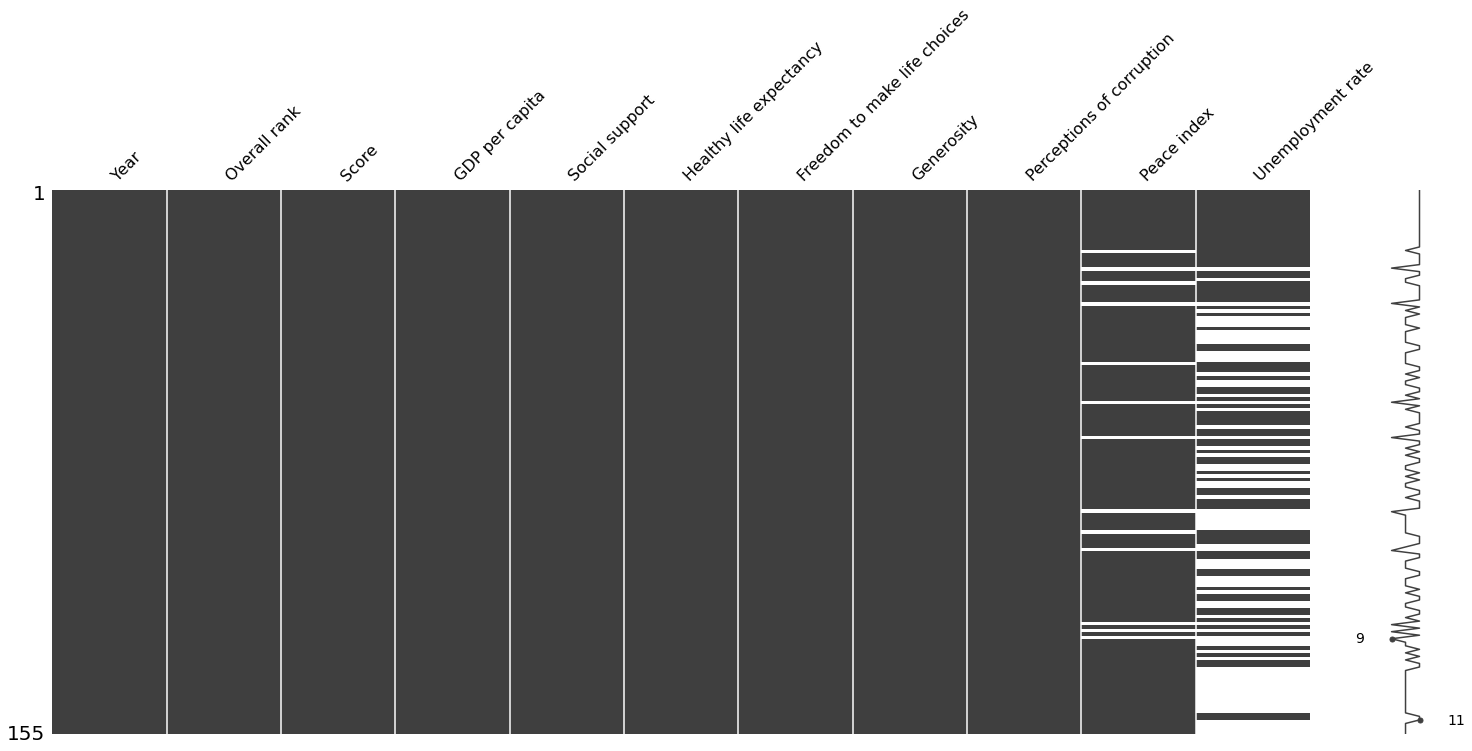

In [25]:
none_values(df=complete_data_2017)


Preview of data with null values:


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Luxembourg,2018,17,6.910,1.576,1.520,0.896,0.632,0.196,0.321,NaN,5.6106
United Arab Emirates,2018,20,6.774,2.096,0.776,0.670,0.284,0.186,NaN,1.816,NaN
Czech Republic,2018,21,6.711,1.233,1.489,0.854,0.543,0.064,0.034,NaN,NaN


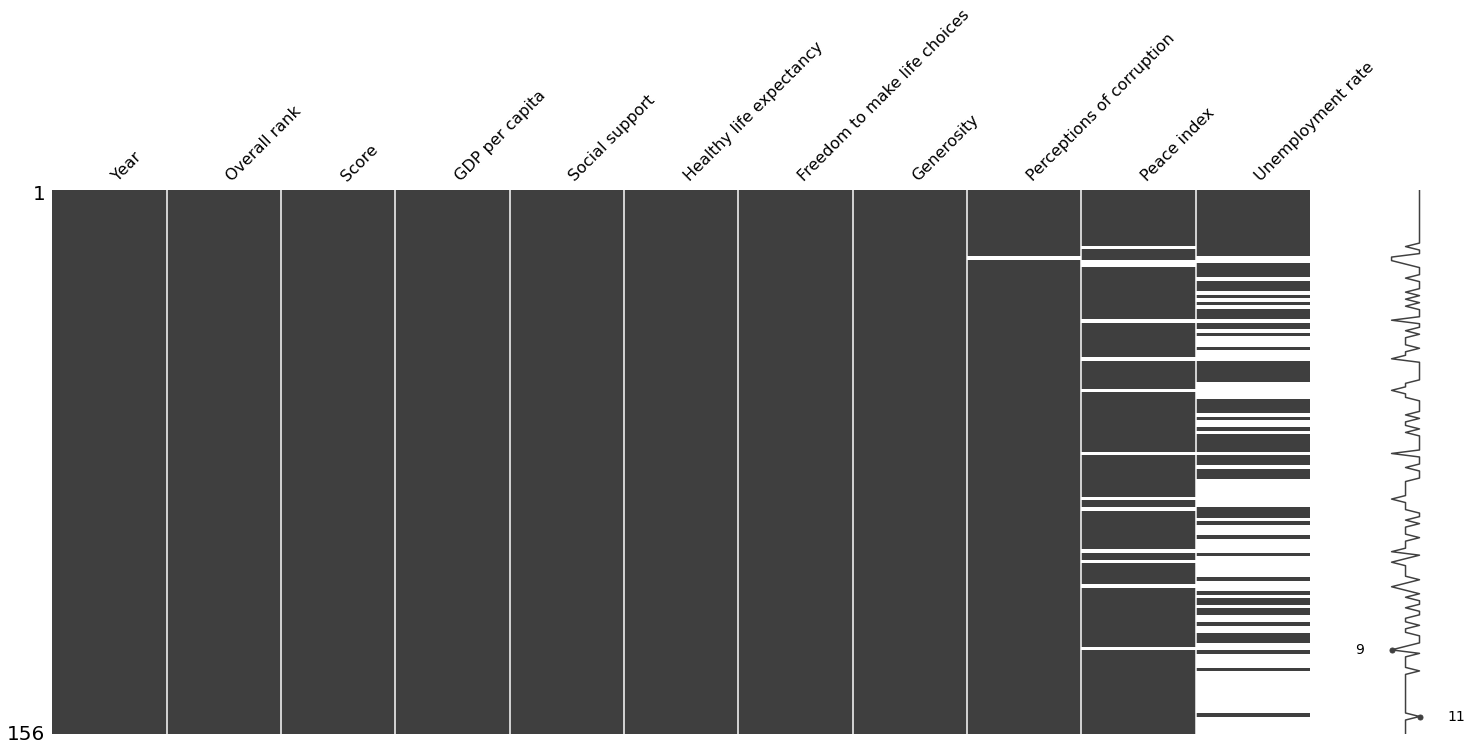

In [26]:
none_values(df=complete_data_2018)


Preview of data with null values:


,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index,Unemployment rate
Country,,,,,,,,,,,
Luxembourg,2019,14,7.090,1.609,1.479,1.012,0.526,0.194,0.316,NaN,5.6197
Czech Republic,2019,20,6.852,1.269,1.487,0.920,0.457,0.046,0.036,NaN,NaN
Malta,2019,22,6.726,1.300,1.520,0.999,0.564,0.375,0.151,NaN,3.4648


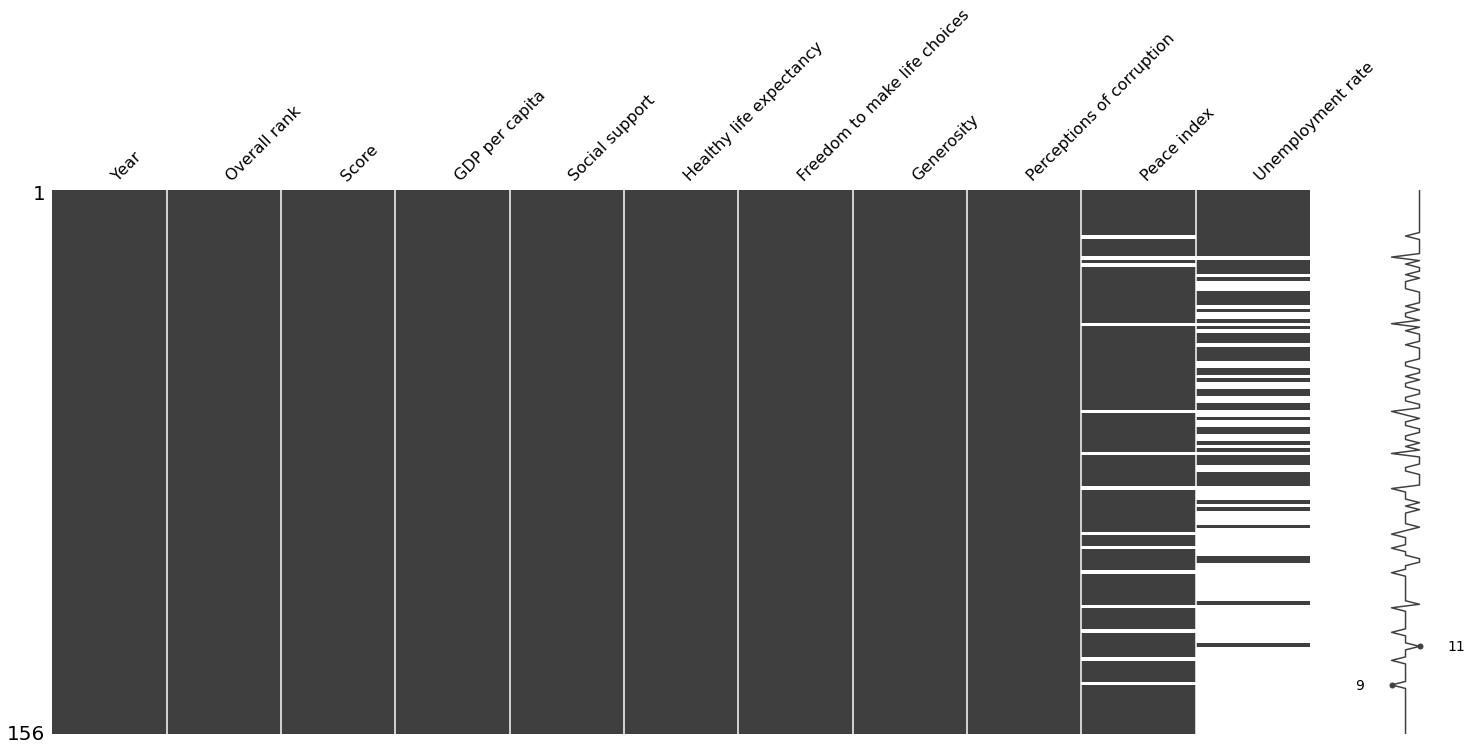

In [27]:
none_values(df=complete_data_2019)

Looking at the graph above, it is quite clear that the first 9 columns do not have any missing data, but the last 2 columns do. This was to be expected as the first 9 columns are taken from one dataset and the last 2 columns were added manually and might not have the exact same amount of countries on which they were merged. 

When having a more specific look at the percentages of missing values of the columns, we can see that the missing values of "Peace index" is only around 8% to 10%, but the percentage of missing values in "Unemployment rate" is much higher at 48% to 58%. As this percentage is so high that there is not enough information to actually draw conlusions, I will remove the "Unemployment Rate" column. 

In [28]:
#Finding out the percentages of missing data.
(complete_data_2015.isna().sum() / len(complete_data_2015)) * 100
(complete_data_2016.isna().sum() / len(complete_data_2016)) * 100
(complete_data_2017.isna().sum() / len(complete_data_2017)) * 100
(complete_data_2018.isna().sum() / len(complete_data_2018)) * 100
(complete_data_2019.isna().sum() / len(complete_data_2019)) * 100

Year                             0.000000
Overall rank                     0.000000
Score                            0.000000
GDP per capita                   0.000000
Social support                   0.000000
Healthy life expectancy          0.000000
Freedom to make life choices     0.000000
Generosity                       0.000000
Perceptions of corruption        0.000000
Peace index                      8.974359
Unemployment rate               58.974359
dtype: float64

In [29]:
#Dropping column of Unemployment rate via function.
complete_data_2015 = drop_column(df=complete_data_2015)
complete_data_2016 = drop_column(df=complete_data_2016)
complete_data_2017 = drop_column(df=complete_data_2017)
complete_data_2018 = drop_column(df=complete_data_2018)
complete_data_2019 = drop_column(df=complete_data_2019)

In [30]:
# For the missing data in the Peace index column, I will fill the nan value with the average values. 
complete_data_2015 = fill_none_values(df=complete_data_2015)
complete_data_2016 = fill_none_values(df=complete_data_2016)
complete_data_2017 = fill_none_values(df=complete_data_2017)
complete_data_2018 = fill_none_values(df=complete_data_2018)
complete_data_2019 = fill_none_values(df=complete_data_2019)

Now that we have checked the missing values, we will continue with the duplicated values.

In [31]:
#Running dataframes through function to show the duplicates, if there are any.
show_duplicates(df=complete_data_2015)


No duplicated entries found


In [32]:
show_duplicates(df=complete_data_2016)


No duplicated entries found


In [33]:
show_duplicates(df=complete_data_2017)


No duplicated entries found


In [34]:
show_duplicates(df=complete_data_2018)


No duplicated entries found


In [35]:
show_duplicates(df=complete_data_2019)


No duplicated entries found


As we can see there are no duplicated entries in the dataframes. 

Lastly, before continuing with visualizing and studying the data, it is important to take into account that if we want to draw any accurate conlusions regarding the column "World peace index" and its relation to the happiness score, we will need to make sure the happiness score is updated with this information. As the happiness score has been the sum of all the factors in the dataframe, we will need to do the same for this column. However, in this case, as the lowest number in the peace index is the best to have as a country (the most peaceful), we will not add the number to the score, but instead subtract it. 

In [36]:
complete_data_2019

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
Country,,,,,,,,,,
Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1.488
Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1.316
Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1.536
Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1.072
Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1.530
...,...,...,...,...,...,...,...,...,...,...
Rwanda,2019,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2.014
Tanzania,2019,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1.860
Afghanistan,2019,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3.300


In [37]:
#applying function to update the happiness score and rank of each dataset.
complete_date_2015 = change_score_rank(df=complete_data_2015)
complete_date_2016 = change_score_rank(df=complete_data_2016)
complete_date_2017 = change_score_rank(df=complete_data_2017)
complete_date_2018 = change_score_rank(df=complete_data_2018)
complete_date_2019 = change_score_rank(df=complete_data_2019)

Score and rank updated
Score and rank updated
Score and rank updated
Score and rank updated
Score and rank updated


In [38]:
complete_data_2019

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
Country,,,,,,,,,,
Iceland,2019,1,6.422,1.380,1.624,1.026,0.591,0.354,0.118,1.072
Denmark,2019,2,6.284,1.383,1.573,0.996,0.592,0.252,0.410,1.316
Finland,2019,3,6.281,1.340,1.587,0.986,0.596,0.153,0.393,1.488
Switzerland,2019,4,6.105,1.452,1.526,1.052,0.572,0.263,0.343,1.375
New Zealand,2019,5,6.086,1.303,1.557,1.026,0.585,0.330,0.380,1.221
...,...,...,...,...,...,...,...,...,...,...
Syria,2019,152,0.050,0.619,0.378,0.440,0.013,0.331,0.141,3.412
Yemen,2019,153,0.011,0.287,1.163,0.463,0.143,0.108,0.077,3.369
Afghanistan,2019,154,-0.097,0.350,0.517,0.361,0.000,0.158,0.025,3.300


Also I will create one last variable: the concatenation of the dataframes of all the years. This in case I want to plot any graphs showing tendencies over the years.

In [39]:
# Adding all the dataframes of all years together.
df_all_years = pd.concat([complete_data_2015,complete_data_2016,complete_data_2017,complete_data_2018,complete_data_2019],axis=0)

### 3. Creating Api

As part of the project I will create an api with which all the dataframes can be accessed in Json file format. Here I will create the Json file that will later be used in the Api. Please find more information of the Api in in the file: Apis_tb.py.

In [47]:
dfjson(df=complete_data_2015, year=2015)
dfjson(df=complete_data_2016, year=2016)
dfjson(df=complete_data_2017, year=2017)
dfjson(df=complete_data_2018, year=2018)
dfjson(df=complete_data_2019, year=2019)

all_year_json = df_all_years.reset_index()
dfjson(df=all_year_json, year="All") 

'File data_all_years.json has been loaded'

The Api will return in Json format the dataframe of all years combined or a dataframe in Json format of a specific year, dependent on the argument that is put in by the user. Please see the api instructions file in the Resources folder for more information. 

### 4. Studying and visualizing the data

Now that we have clean dataframes to work with we will continue Studying and visualizing the data in order to gain insights and eventually see if the hypothesis is correct or incorrect. 

The studying and visualizing of the data will be devided the following 2 parts:

4.1 Analyzing the dataframe in general and having a look at the correlation between the different columns.

4.2 Specifically analyzing the data to give an answer to the hypothesis.

#### 4.1 Generally analyzing the data


In [40]:
#Showing the average happiness score of all years of each country.
mean_score = df_all_years.reset_index().groupby("Country").mean()
globe_happiness_score(df=mean_score)

##### observations:
-

In [41]:
#plotting an overview of the countries in order of their happiness score of each year.
score_order_bar(df=complete_data_2015, year=2015)
score_order_bar(df=complete_data_2016, year=2016)
score_order_bar(df=complete_data_2017, year=2017)
score_order_bar(df=complete_data_2018, year=2018)
score_order_bar(df=complete_data_2019, year=2019)

##### Observations:

In [42]:
#Making several bubble scatter plots to see the correlation between different columns. For now to keep the number of graphs limited I will only plot the graphs of the dataset of 2019. 
scatter_show(df=complete_data_2019, column="GDP per capita", size="Social support")

#### Observations:

In [44]:
scatter_show(df=complete_data_2019, column="Peace index", size="Perceptions of corruption")

#### Observations:

In [45]:
scatter_show(df=complete_data_2019, column="Healthy life expectancy", size="Freedom to make life choices")

#### Observations:

In [47]:
#Plotting the distribution of the happiness score of 2019 
#distribution_show(df=complete_data_2015, year=2015)
#distribution_show(df=complete_data_2015, year=2016)
#distribution_show(df=complete_data_2015, year=2017)
#distribution_show(df=complete_data_2015, year=2018)
# nog naar kijken want alle jaren zijn hetzelfde??
distribution_show(df=complete_data_2015, year=2019)

#### Observations:

In [169]:
#Plotting tendencies of each column. In oder to keep the graphs neat and to be able to clearly see the tendency I will only plot a selected number of countries:
countries = ["Iceland", "Denmark", "Switzerland", 'United States',  "Uruguay", 'United Kingdom','Brazil','Spain', "Finland", "Sweden", "United Arab Emirates", "Australia"]
df_all_years_filtered=df_all_years[df_all_years.index.isin(countries)]

In [171]:
tendency(df_all_years_filtered, column="Overall rank")

#### Observations:

In [173]:
tendency(df_all_years_filtered, column="GDP per capita")

#### Observations:

In [175]:
tendency(df_all_years_filtered, column="Social support")

#### Observations:

In [177]:
tendency(df_all_years_filtered, column="Healthy life expectancy")

#### Observations:

In [179]:
tendency(df_all_years_filtered, column="Freedom to make life choices")

#### Observations:

In [181]:
tendency(df_all_years_filtered, column="Generosity")

#### Observations:

In [183]:
tendency(df_all_years_filtered, column="Perceptions of corruption")

#### Observations:

In [185]:
tendency(df_all_years_filtered, column="Peace index")

#### Observations:

#### 4.2 Analyzing the hypothesis.

Now that we have observed the dataset and made some general visualizations to draw conclusions, I will now specifically focus on making graphs and plots to answer the hypothesis.

* The happiest country in the world does not change over the years / The happiest country(rank 1) is the same each year.

In [48]:
# To see if the happiest country is the same each year or not I will show the top 5 happiest of each year and plot the tendency of the overall rank over the years. 
top5_show(df=complete_data_2015, year=2015) 
top5_show(df=complete_data_2016, year=2016) 
top5_show(df=complete_data_2017, year=2017) 
top5_show(df=complete_data_2018, year=2018) 
top5_show(df=complete_data_2019, year=2019) 

#### Observations:
-
-
-

In [49]:
#Filtering the dataframe of all the years for only top 7 of overall rank of each year. I chose 7 to be sure the data is easy to read. Otherwise there are many "holes"/missing parts in the graph. 
df_all_years_top_7 = df_all_years[df_all_years["Overall rank"] <= 7]
tendency(df=df_all_years_top_7, column="Overall rank")

#### Observations:
- 

Hypothesis 2:
* The most important factor to influence world happiness is GDP / The famous quote: "Money makes happiness" is    true.


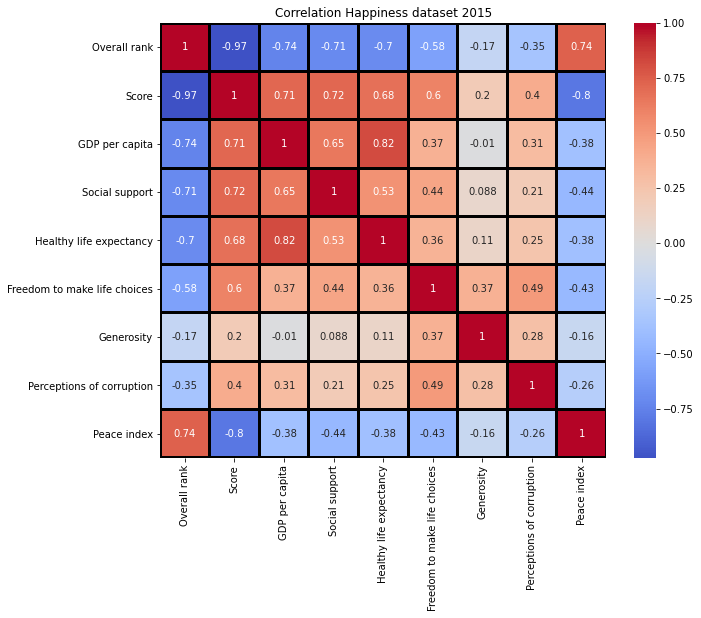

In [191]:
# To see if how much each factor (column) of the dataset influences the happines score and thus see which factor is most important in relation to the happiness score, I will make correlation plots of each dataset per year.

df_to_corr(df=complete_data_2015, year=2015)

##### observations:
- 

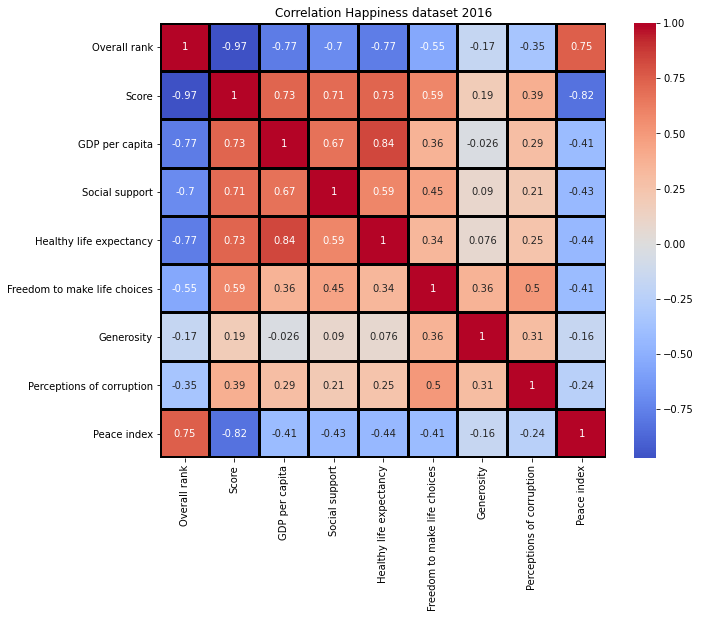

In [193]:
df_to_corr(df=complete_data_2016, year=2016)

##### observations:
- 

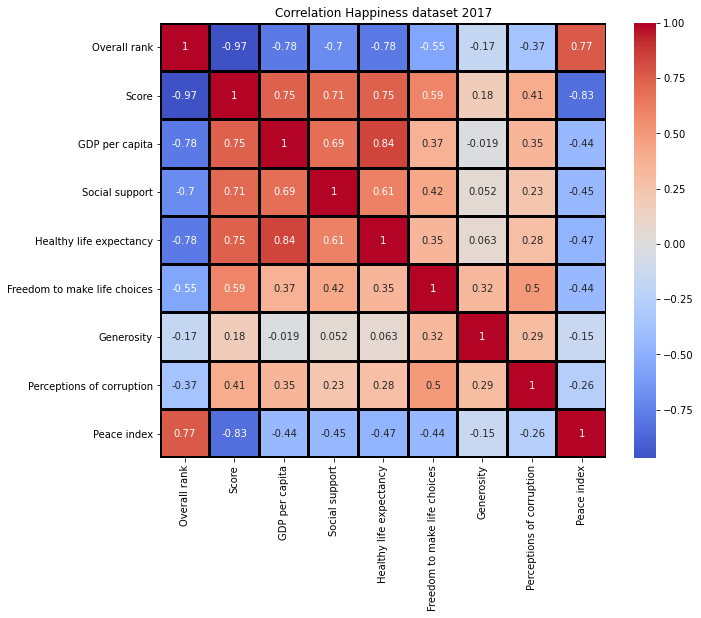

In [195]:
df_to_corr(df=complete_data_2017, year=2017)

##### observations:
- 

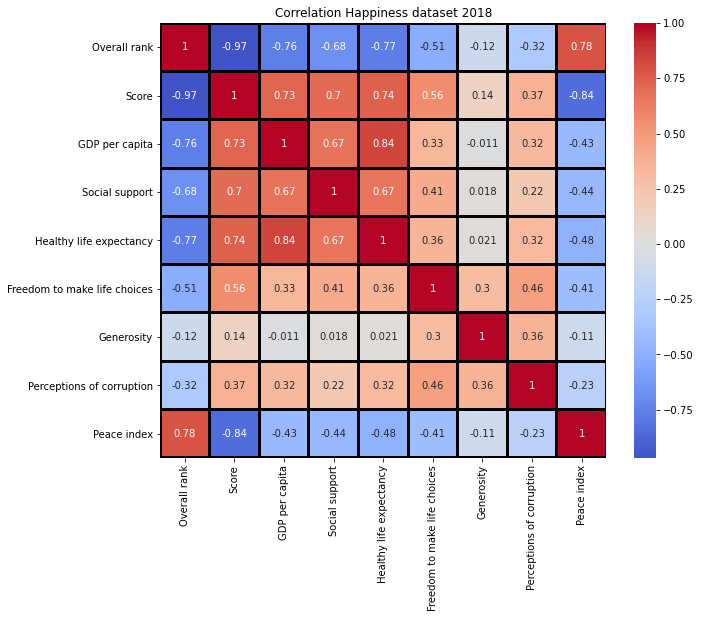

In [197]:
df_to_corr(df=complete_data_2018, year=2018)

##### observations:
- 

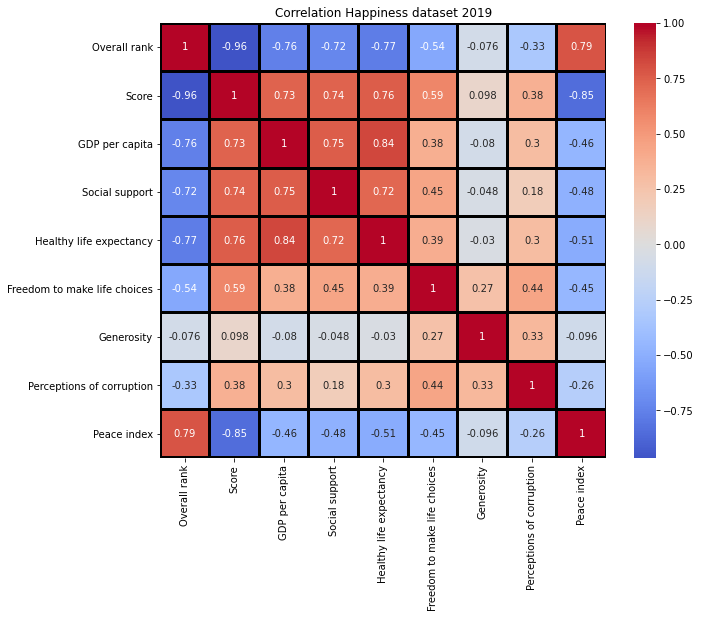

In [199]:
df_to_corr(df=complete_data_2019, year=2019)

##### observations:
- 

### 5. Conclusions

From the observation made above on each of the hypthesis we can make the following conclusions:

1. The happiest country in the world does not change over the years is ...........

2. The most important factor to influence world happiness is GDP is ............


-----------------------------------------------------------------------------------------------------

https://www.kaggle.com/aashita/guide-to-animated-bubble-charts-using-plotly animated bubble charts!

In [200]:
df_all_years

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
Country,,,,,,,,,,
Iceland,2015,1,5.277,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.142
Denmark,2015,2,5.169,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.179
New Zealand,2015,3,4.760,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,1.263
Canada,2015,4,4.753,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.337
Switzerland,2015,5,4.701,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.443
...,...,...,...,...,...,...,...,...,...,...
Yemen,2019,152,-3.358,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,3.369
Syria,2019,153,-3.362,0.61900,0.37800,0.44000,0.01300,0.33100,0.14100,3.412
Afghanistan,2019,154,-3.397,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,3.300


In [201]:
df_total_all_years = df_all_years.reset_index()
df_total_all_years

,Country,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
0,Iceland,2015,1,5.277,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.142
1,Denmark,2015,2,5.169,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.179
2,New Zealand,2015,3,4.760,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,1.263
3,Canada,2015,4,4.753,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.337
4,Switzerland,2015,5,4.701,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.443
...,...,...,...,...,...,...,...,...,...,...,...
777,Yemen,2019,152,-3.358,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,3.369
778,Syria,2019,153,-3.362,0.61900,0.37800,0.44000,0.01300,0.33100,0.14100,3.412
779,Afghanistan,2019,154,-3.397,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,3.300
780,Central African Republic,2019,155,-3.509,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,3.296


In [202]:


fig = px.scatter(df_total_all_years, x="GDP per capita", y="Score", animation_frame='Year', animation_group='Country', 
	         size="Social support",  color='Country',height=800,
                 hover_name='Country', log_x=True, size_max=60)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 700
plot(fig,  config={'scrollzoom': True})

'temp-plot.html'

In [203]:
df_total_all_years

,Country,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
0,Iceland,2015,1,5.277,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.142
1,Denmark,2015,2,5.169,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.179
2,New Zealand,2015,3,4.760,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,1.263
3,Canada,2015,4,4.753,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.337
4,Switzerland,2015,5,4.701,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1.443
...,...,...,...,...,...,...,...,...,...,...,...
777,Yemen,2019,152,-3.358,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,3.369
778,Syria,2019,153,-3.362,0.61900,0.37800,0.44000,0.01300,0.33100,0.14100,3.412
779,Afghanistan,2019,154,-3.397,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,3.300
780,Central African Republic,2019,155,-3.509,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,3.296


In [204]:
#Showing the average happiness score of all years of each country.
mean_score = df_all_years.reset_index().groupby("Country").mean()
mean_score

,Year,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Peace index
Country,,,,,,,,,,
Afghanistan,2017.0,154.0,-3.15960,0.357113,0.409753,0.254707,0.117924,0.267730,0.058094,3.33620
Albania,2017.0,90.6,0.93980,0.938633,0.754931,0.787696,0.371898,0.167887,0.043201,1.88640
Algeria,2017.0,78.4,1.24640,1.012963,1.074205,0.665057,0.178437,0.069219,0.146099,2.21060
Angola,2016.5,123.0,-0.18725,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2.02975
Argentina,2017.0,39.0,2.40580,1.111035,1.330960,0.760895,0.481620,0.092371,0.064308,2.02680
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2017.0,107.8,0.31820,1.052468,1.323264,0.683741,0.213709,0.057186,0.071444,2.60660
Vietnam,2017.0,74.4,1.36260,0.723416,1.138384,0.722700,0.577207,0.195664,0.091921,1.89600
Yemen,2017.0,154.4,-3.30700,0.489313,0.865448,0.365440,0.244175,0.096929,0.067045,3.46640


In [205]:
trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = mean_score.index,
               text = mean_score.index, 
               z = mean_score["Score"],
               )]

layout = dict(title = 'Average Happiness Score 2015-2019',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

# Update Layout Object
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


In [206]:
def globe_happiness_score(df):
    trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = df.index,
               text = df.index, 
               z = df["Score"],
               )]

    layout = dict(title = 'Average Happiness Score 2015-2019',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
             )))


    annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

        # Update Layout Object
    layout[ 'annotations' ] = annot


    fig = go.Figure(data = trace1, layout = layout)
    py.iplot(fig)

In [207]:
globe_happiness_score(df=mean_score)